<a href="https://colab.research.google.com/github/albert-h-wong/DS1_Sprint1_Project/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving LoanStats_securev1_2018Q3.csv to LoanStats_securev1_2018Q3 (1).csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving LoanStats_securev1_2017Q3.csv to LoanStats_securev1_2017Q3.csv


In [0]:
df = pd.read_csv("LoanStats_securev1_2018Q3 (1).csv", low_memory=False)

In [0]:
df2 = pd.read_csv("LoanStats_securev1_2017Q3.csv", low_memory=False)

In [0]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,138894113,NaN,12000.0,12000.0,12000.0,36 months,8.46%,378.59,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,141060314,NaN,24000.0,24000.0,24000.0,36 months,8.46%,757.18,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,141103661,NaN,32000.0,32000.0,32000.0,60 months,20.89%,863.73,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,141042272,NaN,12000.0,12000.0,12000.0,36 months,6.11%,365.67,A,A1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
4,140902382,NaN,12000.0,12000.0,12000.0,60 months,22.35%,333.82,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})

df2 = df2.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})

# Drop irrelevant columns
df.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)
df2.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

In [0]:
# Import our libraries we are going to use for our data analysis.
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# plotly.tools.set_credentials_file(username='albert-h-wong', api_key='YvVOkWUo1huxjFjm7Z1u')

# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Other Libraries
import time


% matplotlib inline

In [0]:
print(df["loan_status"].value_counts())
print(df2["loan_status"].value_counts())

Current               122754
Fully Paid              3675
In Grace Period          947
Late (31-120 days)       539
Late (16-30 days)        241
Charged Off               38
Name: loan_status, dtype: int64
Current               84284
Fully Paid            26197
Charged Off            6889
Late (31-120 days)     3116
In Grace Period        1660
Late (16-30 days)       552
Default                   3
Name: loan_status, dtype: int64


In [0]:
# Determining the loans that are bad from loan_status column

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]


df['loan_condition'] = np.nan
df2['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)
df2['loan_condition'] = df2['loan_status'].apply(loan_condition)

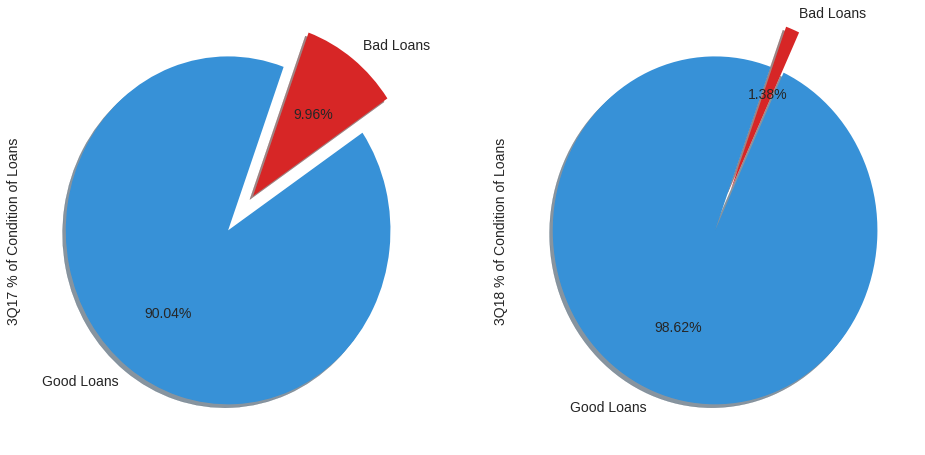

In [0]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

df2["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=14, startangle=70)

df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[1], shadow=True, colors=colors, 
                                             labels=labels, fontsize=14, startangle=70)

ax[0].set_ylabel('3Q17 % of Condition of Loans', fontsize=14)
ax[1].set_ylabel('3Q18 % of Condition of Loans', fontsize=14)

palette = ["#3791D7", "#E01E1B"]



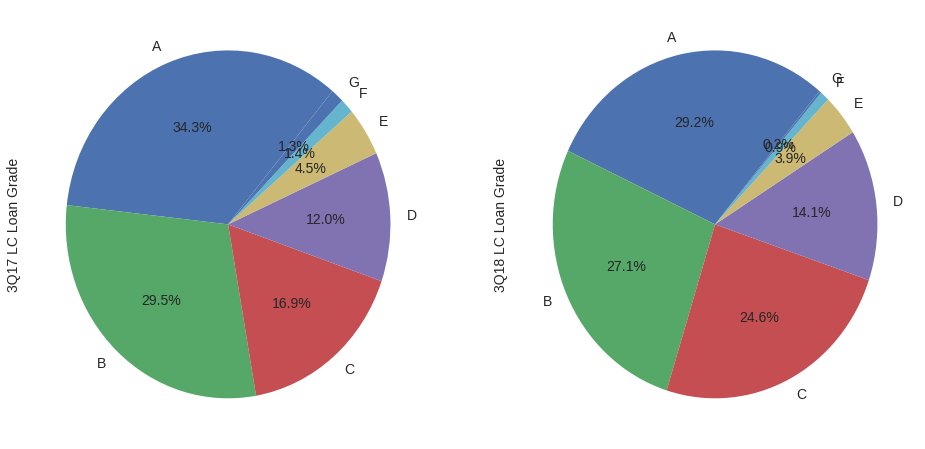

In [0]:
f, ax = plt.subplots(1,2, figsize=(16,8))


labels ="A", "B","C","D","E","F","G"

df2["grade"].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0],
                                             labels=labels, fontsize=14, startangle=50)

df["grade"].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1],
                                             labels=labels, fontsize=14, startangle=50)

ax[0].set_ylabel('3Q17 LC Loan Grade', fontsize=14)
ax[1].set_ylabel('3Q18 LC Loan Grade', fontsize=14)

palette = ["#3791D7", "#E01E1B"]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



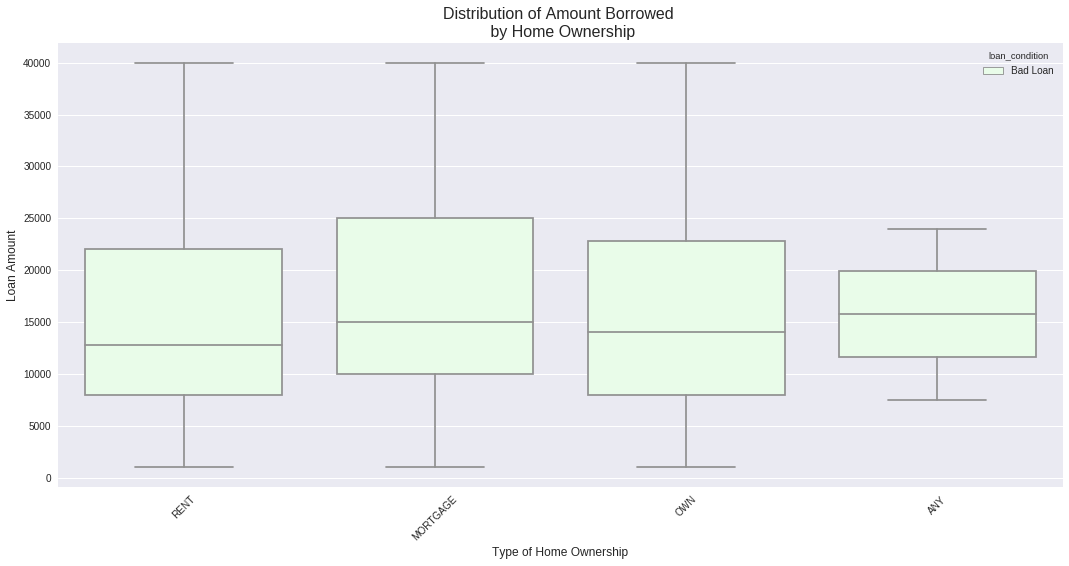

In [0]:
import seaborn as sns

plt.figure(figsize=(18,18))

# Create a dataframe for bad loans
bad_df = df.loc[df['loan_condition'] == 'Bad Loan']

plt.subplot(211)
g = sns.boxplot(x='home_ownership', y='loan_amount', hue='loan_condition',
               data=bad_df, color='g')

g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Type of Home Ownership", fontsize=12)
g.set_ylabel("Loan Amount", fontsize=12)
g.set_title("Distribution of Amount Borrowed \n by Home Ownership", fontsize=16)


plt.show();

In [0]:
df['purpose'].value_counts()

# Education, renewable energy, wedding are the purposed that contains highest bad loans percent wise.

purpose_condition = round(pd.crosstab(df['loan_condition'], df['purpose']).apply(lambda x: x/x.sum() * 100), 2)

purpose_bad_loans = purpose_condition.values[0].tolist()
purpose_good_loans = purpose_condition.values[1].tolist()
purpose = purpose_condition.columns


bad_plot = go.Bar(
    x=purpose,
    y=purpose_bad_loans,
    name = 'Bad Loans',
    text='%',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line = dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2
        )
    )
)

good_plot = go.Bar(
    x=purpose,
    y=purpose_good_loans,
    name='Good Loans',
    text='%',
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line = dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2
        )
    )
)


data = [bad_plot, good_plot]

layout = go.Layout(
    title='Condition of Loan by Purpose',
    xaxis=dict(
        title=''
    ),
    yaxis=dict(
        title='% of the Loan',
    ),
    paper_bgcolor='#FFF8DC',
    plot_bgcolor='#FFF8DC',
    showlegend=True
)


In [0]:
# Work on a plot to explain better the correlations between the different columns in final_df dataframe.
# We will do a Subplot in Plotly with 

import plotly.plotly as py
import plotly.graph_objs as go

# Labels
purpose_labels = df['purpose'].unique()

# Average Interest Rate Dot Plots # 1st Subplot
high_income = final_df['interest_rate'].loc[final_df['income_category'] == 'High'].values.tolist()
medium_income = final_df['interest_rate'].loc[final_df['income_category'] == 'Medium'].values.tolist()
low_income = final_df['interest_rate'].loc[final_df['income_category'] == 'Low'].values.tolist()

high_lst = ['%.2f' % val for val in high_income]
med_lst = ['%.2f' % val for val in medium_income]
low_lst = ['%.2f' % val for val in low_income]



trace1 = {"x": high_lst,
          "y": purpose_labels,
          "marker": {"color": "#0040FF", "size": 16},
          "mode": "markers",
          "name": "High Income",
          "type": "scatter"
}

trace2 = {"x": med_lst,
          "y": purpose_labels,
          "marker": {"color": "#FE9A2E", "size": 16},
          "mode": "markers",
          "name": "Medium Income",
          "type": "scatter",
}

trace3 = {"x": low_lst,
          "y": purpose_labels,
          "marker": {"color": "#FE2E2E", "size": 16},
          "mode": "markers",
          "name": "Low Income",
          "type": "scatter",
}




data = [trace1, trace2, trace3]
layout = {"title": "Average Purpose Interest Rate <br> <i> by Income Category </i> ",
          "xaxis": {"title": "Average Interest Rate", },
          "yaxis": {"title": ""}}

fig = go.Figure(data=data, layout=layout)
iplot(fig)

NameError: ignored